## Missing Values

Missing data, or missing values, occur when __no data__ / __no value__ is stored for certain observations within a variable. 

Incomplete data is an unavoidable problem in most data sources, and may have a significant impact on the conclusions that can be derived from the data. 

### Why is data missing?

The source of missing data can be very different. These are just a few examples:

- A value is missing because it was forgotten, lost or not stored properly
- For a certain observation, the value does not exist
- The value can't be known or identified

In many organisations, information is collected into a form by a person talking with a client on the phone, or alternatively, by customers filling forms online. Often, the person entering the data does not complete all the fields in the form. Many of the fields are not compulsory, which may lead to missing values.

The reasons for omitting the information can vary: perhaps the person does not want to disclose some information, for example income, or they do not know the answer, or the answer is not applicable for a certain circumstance, or on the contrary, the person in the organisation wants to spare the customer some time, and therefore omits asking questions they think are not so relevant.

There are other cases where the value for a certain variable does not exist. For example, in the variable 'total debt as percentage of total income' (very common in financial data), if the person has no income, then the total percentage of 0 does not exist, and therefore it will be a missing value.

It is important to understand **how the missing data are introduced in the dataset**, that is, the **mechanisms** by which missing information is introduced in a dataset. Depending on the mechanism, we may choose to process the missing values differently. In addition, by knowing the source of missing data, we may choose to take action to control that source and decrease the amount of missing information looking forward during data collection.


### Missing Data Mechanisms

There are 3 mechanisms that lead to missing data, 2 of them involve missing data randomly or almost-randomly, and the third one involves a systematic loss of data.

#### Missing Completely at Random, MCAR:

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. 
When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other. If values for observations are missing completely at random, then disregarding those cases would not bias the inferences made.


#### Missing at Random, MAR: 

MAR occurs when there is a relationship between the propensity of missing values and the observed data. In other words, the probability of an observation being missing depends on available information (i.e., other variables in the dataset). For example, if men are more likely to disclose their weight than women, weight is MAR. The weight information will be missing at random for those men and women who do not disclose their weight, but as men are more prone to disclose it, there will be more missing values for women than for men.

In a situation like the above, if we decide to proceed with the variable with missing values (in this case weight), we might benefit from including gender to control the bias in weight for the missing observations.


#### Missing Not at Random, MNAR: 

Missing data is not at random (MNAR) when there is a mechanism or a reason why missing values are introduced in the dataset. For example, MNAR would occur if people failed to fill in a depression survey because of their level of depression. Here, the missing of data is related to the outcome, depression. Similarly, when a financial company asks for bank and identity documents from customers in order to prevent identity fraud, typically, fraudsters impersonating someone else will not upload documents, because they don't have them, because they are fraudsters. Therefore, there is a systematic relationship between the missing documents and the target we want to predict: fraud.

Understanding the mechanism by which data is missing is important to decide which methods to use to impute the missing values.

====================================================================================================

## In this Demo:

In the following cells we will:

- Learn how to detect and quantify missing values

- Try to identify the 3 different mechanisms of missing data introduction

We will use the toy Loan dataset and the Titanic dataset.

- To download the datasets, please refer to the **Datasets** lecture in **Section 1** of the course.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [3]:
# let's load the titanic dataset
data = pd.read_csv('../Datasets/titanic.csv')

# let's inspect the first 5 rows
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In python, the missing values are stored as NaN, see for example the first row for the variable Cabin.

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


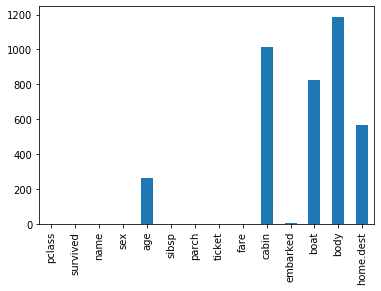

In [8]:
# we can quantify the total number of missing values using
# the isnull method plus the sum method on the dataframe
print(data.isnull().sum())
data.isnull().sum().plot.bar();

There are 263 missing values for Age, 1014 for Cabin and 2 for Embarked.

In [9]:
# alternatively, we can use the mean method after isnull
# to visualise the percentage of
# missing values for each variable

data.isnull().mean()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

There are missing data in the variables Age (20% missing), Cabin -in which the passenger was traveling- (77% missing), and Embarked -the port from which the passenger got into the Titanic- (~0.2%  missing).

## Mechanisms of Missing Data

### Missing data Not At Random (MNAR): Systematic missing values

In the Titanic dataset, both the missing values of the variables **age** and **cabin**, were introduced systematically. For many of the people who did not survive, the **age** they had or the **cabin** they were traveling in, could not be established. The people who survived could be otherwise asked for that information.

Can we infer this by looking at the data?

In a situation like this, we could expect a greater number of missing values for people who did not survive.

Let's have a look.

In [5]:
# let's create a binary variable that indicates 
# whether the value of cabin is missing

data['cabin_null'] = np.where(data['cabin'].isnull(), 1, 0)

In [6]:
# let's evaluate the percentage of missing values in
# cabin for the people who survived vs the non-survivors.

# the variable Survived takes the value 1 if the passenger
# survived, or 0 otherwise

# group data by Survived vs Non-Survived
# and find the percentage of nulls for cabin
data.groupby(['survived'])['cabin_null'].mean()

survived
0    0.873918
1    0.614000
Name: cabin_null, dtype: float64

In [7]:
# another way of doing the above, with less lines
# of code :)

data['cabin'].isnull().groupby(data['survived']).mean()

survived
0    0.873918
1    0.614000
Name: cabin, dtype: float64

We observe that the percentage of missing values is higher for people who did not survive (87%), respect to people who survived (60%). This finding is aligned with our hypothesis that the data is missing because after people died, the information could not be retrieved.

**Note**: Having said this, to truly underpin whether the data is missing not at random, we would need to get extremely familiar with the way data was collected. Analysing datasets, can only point us in the right direction or help us build assumptions.

In [8]:
# Let's do the same for the variable age:

# First we create a binary variable to indicates
# whether the value of Age is missing

data['age_null'] = np.where(data['age'].isnull(), 1, 0)

# and then look at the mean in the different survival groups:
data.groupby(['survived'])['age_null'].mean()

survived
0    0.234858
1    0.146000
Name: age_null, dtype: float64

In [9]:
# or the same with simpler code :)

data['age'].isnull().groupby(data['survived']).mean()

survived
0    0.234858
1    0.146000
Name: age, dtype: float64

Again, we observe a higher number of missing data for the people who did not survive the tragedy. The analysis therefore suggests that there is a systematic loss of data: people who did not survive tend to have more missing information. Presumably, the method chosen to gather the information, contributes to the generation of these missing data.

### Missing data Completely At Random (MCAR)

In [10]:
# In the titanic dataset, there are also missing values
# for the variable Embarked.
# Let's have a look.

# Let's slice the dataframe to show only the observations
# with missing values for Embarked

data[data['embarked'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_null,age_null
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,0,0
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH",0,0


These 2 women were traveling together, Miss Icard was the maid of Mrs Stone.

A priori, there does not seem to be an indication that the missing information in the variable Embarked is depending on any other variable, and the fact that these women survived, means that they could have been asked for this information.

Very likely the values were lost at the time of building the dataset.

If these values are MCAR, the probability of data being missing for these 2 women is the same as the probability for values to missing for any other person on the titanic. Of course this will be hard, if possible at all, to prove. But I hope this serves as a demonstration.

### Missing data at Random (MAR)

For this example, I will use the loan book toy dataset from this ficticious peer to peer lending company.

We will look at the variables employment and years in employment, both declared by the borrowers at the time of applying for a loan. 

In this example, data missing in employment are associated with data missing in time in employment.

In [11]:
# let's load the columns of interest for this exercise

data = pd.read_csv('../loan.csv', usecols=['employment', 'time_employed'])

data.head()

,employment,time_employed
0,Teacher,<=5 years
1,Accountant,<=5 years
2,Statistician,<=5 years
3,Other,<=5 years
4,Bus driver,>5 years


In [12]:
# let's check the percentage of missing data

data.isnull().mean()

employment       0.0611
time_employed    0.0529
dtype: float64

We see that both variables have the same percentage of missing observations roughly.

In [13]:
# let's insptect the different employment types

# number of different employments
print('Number of employments: {}'.format(
    len(data['employment'].unique())))

# Examples of employments
data['employment'].unique()

Number of employments: 12


array(['Teacher', 'Accountant', 'Statistician', 'Other', 'Bus driver',
       'Secretary', 'Software developer', 'Nurse', 'Taxi driver', nan,
       'Civil Servant', 'Dentist'], dtype=object)

We observe the missing information (nan), and several different employments of the people.

In [14]:
# let's inspect the variable time employed

data['time_employed'].unique()

array(['<=5 years', '>5 years', nan], dtype=object)

The customer can't enter a value for employment time if they are not employed. They could be students, retired, self-employed, or work in the house. But we see how these 2 variables are related to each other.

In [15]:
# let's calculate the proportion of missing data for the time_employed variable
# for customers who declared employment

# customers who declared employment
t = data[~data['employment'].isnull()]

# percentage of missing data in time employed
t['time_employed'].isnull().mean()

0.0005325380764724678

In [16]:
# let's do the same for those bororwers who did not 
# report employment


# customers who did not declare employment
t = data[data['employment'].isnull()]

# percentage of missing data in time employed
t['time_employed'].isnull().mean()

0.8576104746317512

The number of borrowers who have reported occupation and have missing values in time_employed is minimal. Whereas the customers who did not report an occupation or employment, are mostly reporting missing values in the time_employed variable

This further supports that the missing values in employment are related to the missing values in time_employed.

This is an example of MAR.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**